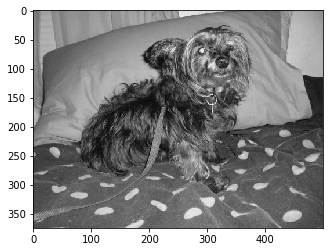

In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import time

NAME="Cats-vs-dogs-cnn-64x2-{}".format(int(time.time()))
directory='E:/kagglecatsanddogs/PetImages' ##dataset from https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
categories=['Dog', 'Cat']

for category in categories:
    path= os.path.join(directory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) ##converting to graysacle as colour is not important in this case
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
        

In [18]:
img_array.shape
print(os.getcwd())

C:\Users\alber


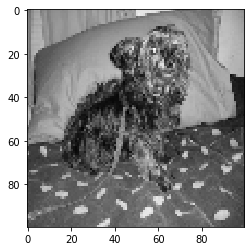

In [4]:
img_size=100
new_array=cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
## creating traning dataset
training_data=[]

def create_training_data():
    for category in categories:
        path= os.path.join(directory, category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) ##converting to graysacle as colour is not important in this case
                new_array=cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [6]:
print(len(training_data))

24946


In [7]:
## shuffling dog and cats images
import random
random.shuffle(training_data)

In [8]:
## reshaping for Keras
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X= np.array(X).reshape(-1, img_size, img_size, 1)

In [13]:
## pickling dataset
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
##model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle

'''
gpu_options=tf.compat.v1.GPUOptions(per_process_gpu_memmory_fraction=0.333) ##force to use a fraction of GPU memmory
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
'''

tensorboard= TensorBoard(log_dir= 'logs\{}'.format(NAME))

X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

X=X/255.0 ##normalizing the data
model= Sequential()
model.add(Conv2D(64, (3,3), input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, batch_size=32,epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 17462 samples, validate on 7484 samples
Epoch 1/5
17462/17462 [==============================] - 274s 16ms/sample - loss: 0.6304 - accuracy: 0.6459 - val_loss: 0.5881 - val_accuracy: 0.6848
Epoch 2/5
17462/17462 [==============================] - 275s 16ms/sample - loss: 0.5035 - accuracy: 0.7540 - val_loss: 0.5102 - val_accuracy: 0.7553
Epoch 3/5
17462/17462 [==============================] - 275s 16ms/sample - loss: 0.4183 - accuracy: 0.8077 - val_loss: 0.5104 - val_accuracy: 0.7599
Epoch 4/5
17462/17462 [==============================] - 272s 16ms/sample - loss: 0.3330 - accuracy: 0.8520 - val_loss: 0.5800 - val_accuracy: 0.7489
Epoch 5/5
17462/17462 [==============================] - 272s 16ms/sample - loss: 0.2263 - accuracy: 0.9084 - val_loss: 0.6131 - val_accuracy: 0.7670


In [26]:
name='cnn_casts_vs_dogs_64x3'
model.save(name)

<IPython.core.display.Javascript object>


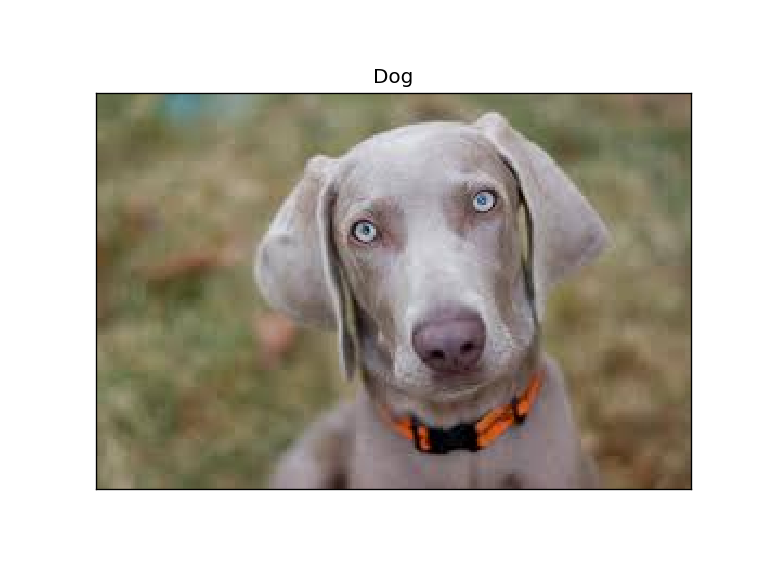

In [87]:
## prediction on random images
def prepare(filepath):
    IMG_SIZE=100
    img_array=cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,1)

model=tf.keras.models.load_model(name)
'''
for pic in os.listdir(path):
    prediction=model.predict(prepare(path+pic))
    print('category for filename '+pic+' '+categories[int(prediction[0][0])])
'''
rand=np.random.randint(0, len(pics))
pic=pics[rand]

prediction=model.predict(prepare(path+pic))
image=cv2.imread('E:/kagglecatsanddogs/test/'+pic,-1)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) ## matplotlib shows images in RGB format
plt.title(categories[int(prediction[0][0])])
plt.imshow(image)
plt.xticks([]),plt.yticks([]) #to remove x and axis marks
plt.show()